In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [26]:
df = pd.read_csv('results_df_LSTM no radical.csv')
df_2 = pd.read_csv('results_df_LSTM_CRF no radical.csv')

In [27]:
df

,trial_id,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,time_this_iter_s,done,timesteps_total,episodes_total,training_iteration,...,time_total_s,pid,hostname,node_ip,time_since_restore,timesteps_since_restore,iterations_since_restore,experiment_tag,config.embedding_num,config.hidden_num
0,24e0d_00000,0.008052,0.967726,0.029962,0.955066,27.245104,True,NaN,NaN,1.0,...,27.245104,1256,LAPTOP-U2GSCB1O,127.0.0.1,27.245104,0.0,1.0,"0_embedding_num=100,hidden_num=100",100,100
1,24e0d_00001,0.007317,0.973588,0.001174,0.953816,28.480834,True,NaN,NaN,1.0,...,28.480834,25400,LAPTOP-U2GSCB1O,127.0.0.1,28.480834,0.0,1.0,"1_embedding_num=150,hidden_num=100",150,100
2,24e0d_00002,0.002711,0.977787,0.011377,0.954408,27.172298,True,NaN,NaN,1.0,...,27.172298,23068,LAPTOP-U2GSCB1O,127.0.0.1,27.172298,0.0,1.0,"2_embedding_num=200,hidden_num=100",200,100
3,24e0d_00003,0.000931,0.980510,0.002961,0.954737,26.043355,True,NaN,NaN,1.0,...,26.043355,23640,LAPTOP-U2GSCB1O,127.0.0.1,26.043355,0.0,1.0,"3_embedding_num=250,hidden_num=100",250,100
4,24e0d_00004,0.001785,0.983005,0.069369,0.955987,28.518696,True,NaN,NaN,1.0,...,28.518696,25864,LAPTOP-U2GSCB1O,127.0.0.1,28.518696,0.0,1.0,"4_embedding_num=300,hidden_num=100",300,100
5,24e0d_00005,0.004657,0.983528,0.022762,0.955132,27.616122,True,NaN,NaN,1.0,...,27.616122,4296,LAPTOP-U2GSCB1O,127.0.0.1,27.616122,0.0,1.0,"5_embedding_num=350,hidden_num=100",350,100
6,24e0d_00006,0.001668,0.984467,0.001208,0.953684,27.425627,True,NaN,NaN,1.0,...,27.425627,29344,LAPTOP-U2GSCB1O,127.0.0.1,27.425627,0.0,1.0,"6_embedding_num=400,hidden_num=100",400,100
7,24e0d_00007,0.004370,0.972140,0.005727,0.952961,27.278016,True,NaN,NaN,1.0,...,27.278016,27640,LAPTOP-U2GSCB1O,127.0.0.1,27.278016,0.0,1.0,"7_embedding_num=100,hidden_num=150",100,150
8,24e0d_00008,0.003022,0.978377,0.016811,0.953882,28.494759,True,NaN,NaN,1.0,...,28.494759,15924,LAPTOP-U2GSCB1O,127.0.0.1,28.494759,0.0,1.0,"8_embedding_num=150,hidden_num=150",150,150
9,24e0d_00009,0.004143,0.982777,0.043143,0.954605,26.876091,True,NaN,NaN,1.0,...,26.876091,1460,LAPTOP-U2GSCB1O,127.0.0.1,26.876091,0.0,1.0,"9_embedding_num=200,hidden_num=150",200,150


In [28]:
print(df.columns)

Index(['trial_id', 'last_train_loss', 'last_train_f1', 'last_dev_loss',
       'last_dev_f1', 'time_this_iter_s', 'done', 'timesteps_total',
       'episodes_total', 'training_iteration', 'experiment_id', 'date',
       'timestamp', 'time_total_s', 'pid', 'hostname', 'node_ip',
       'time_since_restore', 'timesteps_since_restore',
       'iterations_since_restore', 'experiment_tag', 'config.embedding_num',
       'config.hidden_num'],
      dtype='object')


In [ ]:
df_2 

In [ ]:
print(df_2.columns)

In [29]:
df_need= df[['last_train_loss', 'last_train_f1', 'last_dev_loss', 'last_dev_f1', 'config.embedding_num', 'config.hidden_num']]
df_need_2= df_2[['last_train_loss', 'last_train_f1', 'last_dev_loss', 'last_dev_f1', 'config.embedding_num', 'config.hidden_num']]
df_need

,last_train_loss,last_train_f1,last_dev_loss,last_dev_f1,config.embedding_num,config.hidden_num
0,0.008052,0.967726,0.029962,0.955066,100,100
1,0.007317,0.973588,0.001174,0.953816,150,100
2,0.002711,0.977787,0.011377,0.954408,200,100
3,0.000931,0.980510,0.002961,0.954737,250,100
4,0.001785,0.983005,0.069369,0.955987,300,100
5,0.004657,0.983528,0.022762,0.955132,350,100
6,0.001668,0.984467,0.001208,0.953684,400,100
7,0.004370,0.972140,0.005727,0.952961,100,150
8,0.003022,0.978377,0.016811,0.953882,150,150
9,0.004143,0.982777,0.043143,0.954605,200,150


In [30]:
# df 1
last_dev_f1=df_need['last_dev_f1'].to_numpy()
last_dev_loss=df_need['last_dev_loss'].to_numpy()
last_train_f1=df_need['last_train_f1'].to_numpy()
last_train_loss=df_need['last_train_loss'].to_numpy()

# df 2
last_dev_f1_2=df_need_2['last_dev_f1'].to_numpy()
last_dev_loss_2=df_need_2['last_dev_loss'].to_numpy()
last_train_f1_2=df_need_2['last_train_f1'].to_numpy()
last_train_loss_2=df_need_2['last_train_loss'].to_numpy()

# never changes 
embedding_num=df_need['config.embedding_num'].to_numpy()
hidden_num=df_need['config.hidden_num'].to_numpy()

In [31]:
# fig = plt.figure(figsize=(4,4))
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(2,3,4) # plot the point (2,3,4) on the figure
# plt.show()
embedding_num
hidden_num
last_dev_f1

array([0.95506579, 0.95381579, 0.9544079 , 0.95473684, 0.95598684,
       0.95513158, 0.95368421, 0.95296053, 0.95388158, 0.95460526,
       0.955     , 0.95611842, 0.95348684, 0.95407895, 0.95414474,
       0.95355263, 0.95710526, 0.95677632, 0.95460526, 0.95473684,
       0.95756579, 0.9531579 , 0.95210526, 0.95506579, 0.95519737,
       0.95592105, 0.95657895, 0.95585526, 0.95381579, 0.95480263,
       0.95651316,        nan, 0.95519737, 0.95394737, 0.95657895,
              nan,        nan, 0.95407895, 0.95506579, 0.9531579 ,
       0.95493421, 0.95460526, 0.95572368, 0.95052632, 0.95486842,
       0.95421053, 0.95480263, 0.95605263, 0.95736842])

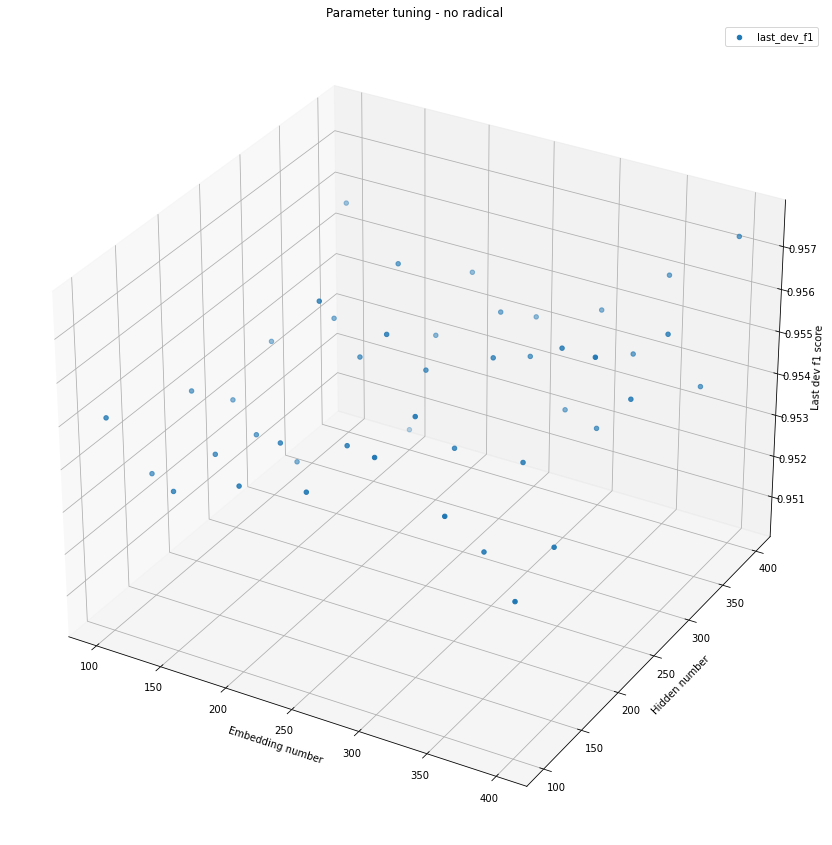

In [41]:
x = embedding_num
y = hidden_num

# df 1
z1 = last_dev_f1
z2 = last_dev_loss
z3 = last_train_f1
z4 = last_train_loss

# df 2 
# z1_2 = last_dev_f1_2
# z2_2 = last_dev_loss_2
# z3_2 = last_train_f1_2
# z4_2 = last_train_loss_2

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

## lines 
# df 1
# ax.plot(x,y,z1,marker='1', linestyle='-', color='r', label='last_dev_f1', linewidth=1)
ax.scatter(x,y,z1, label='last_dev_f1')
# ax.plot(x,y,z2,marker='1', linestyle='--', color='r', label='last_dev_loss', linewidth=1)
# ax.plot(x,y,z3,marker='1', linestyle='-', color='b', label='last_train_f1', linewidth=1)
# ax.plot(x,y,z4,marker='1', linestyle='--', color='b', label='last_train_loss', linewidth=1)
# df 2
# ax.plot(x,y,z1_2,marker='1', linestyle='-', color='r', label='last_dev_f1_crf', linewidth=1)
# ax.plot(x,y,z2_2,marker='1', linestyle='--', color='r', label='last_dev_loss_crf', linewidth=1)
# ax.plot(x,y,z3_2,marker='1', linestyle='-', color='b', label='last_train_f1_crf', linewidth=1)
# ax.plot(x,y,z4_2,marker='1', linestyle='--', color='b', label='last_train_loss_crf', linewidth=1)

##surface.
# df 1
# surf = ax.plot_trisurf(x, y, z1, linewidth=0, antialiased=False)
# df 2
# surf = ax.plot_trisurf(x, y, z1_2, linewidth=0, antialiased=False)

ax.set_title("Parameter tuning - no radical")
ax.set_xlabel("Embedding number")
ax.set_ylabel("Hidden number")
ax.set_zlabel("Last dev f1 score")


# ax.set_xlim(100,200)
# ax.set_ylim(20,160)
# ax.set_zlim(5,35)
# ax.set_xticks([100,125,150,175,200])
# ax.set_yticks([20,55,90,125,160])
# ax.set_zticks([5,15,25,35])

fig.set_size_inches(15, 15)

ax.legend(loc="best")
# plot_surface 

plt.show()